In [2]:
#Grouping mall customers using K-Means

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [47]:
#https://www.kaggle.com/datasets/shwetabh123/mall-customers
df=pd.read_csv("Mall_Customers.csv")

In [54]:
df.columns = ['cust', 'gender', 'age', 'income(k$)', 'spending_score']

In [55]:
df

,cust,gender,age,income(k$),spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
df.describe()

,cust,age,income(k$),spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
X = df.iloc[:, [2, 4]].values
inertia_List = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    inertia_List.append(kmeans.inertia_)

In [53]:
inertia_List

[171535.5,
 75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23818.84825158133,
 19664.73951714552,
 15523.684014328752,
 13002.466488382794,
 11486.150087792641,
 10302.90821609952,
 9538.518728622848,
 8723.643819143817,
 8090.059625307613,
 7260.714628750051,
 6537.013008474901,
 6280.40395813337,
 5649.957470702672,
 5326.62915228906,
 4862.1900613146745,
 4724.495238095237]

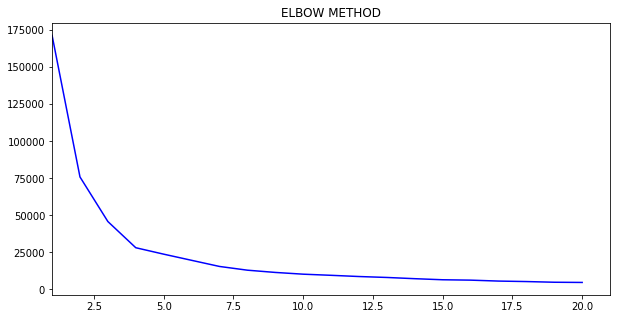

In [56]:
plt.figure(figsize=(10,5))
plt.plot(range(1,21), inertia_List,color='blue')
plt.title('ELBOW METHOD')
plt.xlim(1,21)
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)

In [60]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=101)

In [61]:
kmeans.__dict__

{'n_clusters': 5,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': 101,
 'copy_x': True,
 'algorithm': 'lloyd',
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 0.04288387499999998,
 '_algorithm': 'lloyd',
 '_n_threads': 8,
 'cluster_centers_': array([[27.42222222, 49.82222222],
        [55.40816327, 48.04081633],
        [51.17857143, 15.53571429],
        [31.80952381, 15.        ],
        [30.1754386 , 82.35087719]]),
 '_n_features_out': 5,
 'labels_': array([0, 4, 3, 4, 0, 4, 3, 4, 2, 4, 2, 4, 2, 4, 3, 4, 0, 0, 2, 4, 0, 4,
        2, 4, 2, 4, 2, 0, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 1, 4, 1, 0,
        2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 4, 3, 4, 1, 4, 2, 4, 2, 4,
        0, 4, 3, 4, 2, 4, 3, 4, 2, 4, 0, 4, 

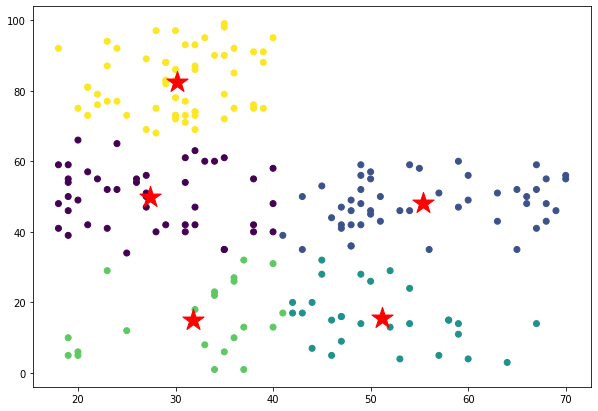

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=500, color='r', marker='*')

In [63]:
df1 = pd.DataFrame(X, columns=['Age', 'Spending'])

In [32]:
df1['grp'] = kmeans.labels_

In [33]:
df1

,Age,Spending,grp
0,19,39,0
1,21,81,4
2,20,6,3
3,23,77,4
4,31,40,0
...,...,...,...
195,35,79,4
196,45,28,2
197,32,74,4
198,32,18,3
